Gözde Ünver 2018400309 \
Mehmet Gökay Yıldız 2017400072

In [1]:
# FEATURE EXTRACTION FROM PHASE 1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import numpy as np
def getImagelist(path):
    return [int(f.split(".")[0]) for f in os.listdir(path)]

train_path="./phase1_files/3dshapes_train"
train_image_nums=getImagelist(train_path)
train_image_nums.sort()
x_train = np.array([np.array(Image.open(os.path.join(train_path,str(img)+".jpg")).convert('L')).flatten() for img in train_image_nums])
y_train=np.load('./phase1_files/orientations_train.npy').reshape(-1,1)
test_path="./phase1_files/3dshapes_test"
test_image_nums=getImagelist(test_path)
test_image_nums.sort()
x_test = np.array([np.array(Image.open(os.path.join(test_path,str(img)+".jpg")).convert('L')).flatten() for img in test_image_nums])
y_test=np.load('./phase1_files/orientations_test.npy').reshape(-1,1)

from sklearn.decomposition import PCA 
# soruce: https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
pca2 = PCA(n_components=68)
x_train_pca=pca2.fit_transform(x_train)
x_test_pca=pca2.transform(x_test)

Q1 a)

In [2]:
# t-SNE from sklearn
from sklearn.manifold import TSNE
tsne1=TSNE(n_components=2,init="random",n_iter=2000,perplexity=45)
x_train_embedded=tsne1.fit_transform(x_train_pca)

In [3]:
unique_y_values=np.unique(y_train)

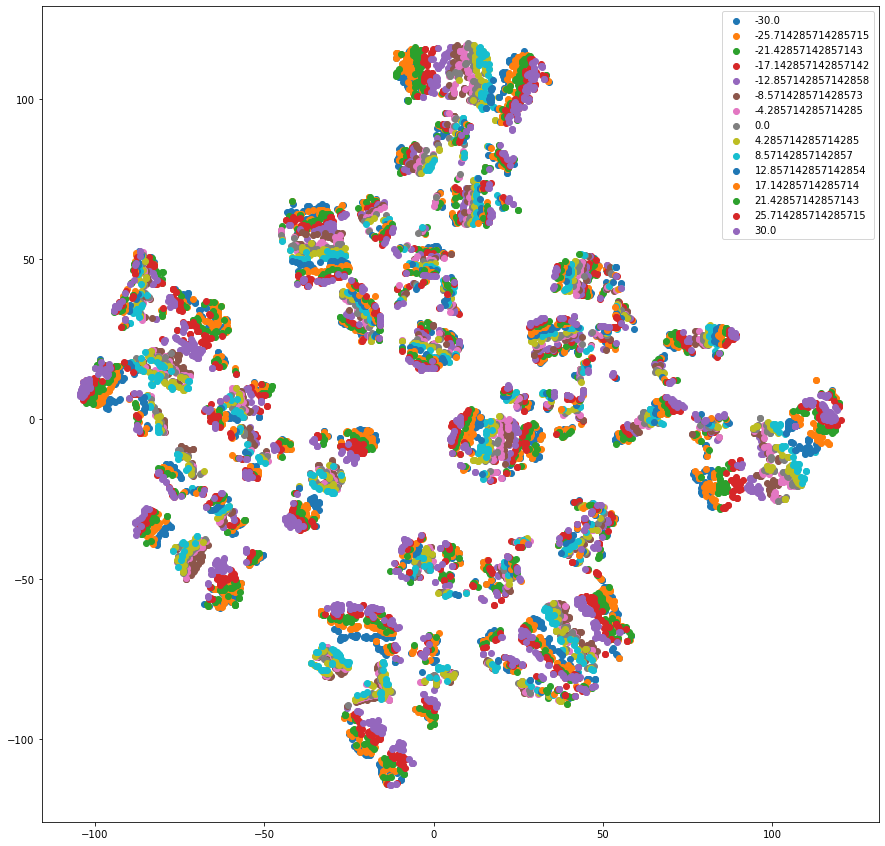

In [4]:
# Scatter plot x_train_embedded points after t-SNE
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
for el in unique_y_values:
    idx=np.where(y_train==el)
    ax.scatter(x_train_embedded[idx,0],x_train_embedded[idx,1])
ax.legend(np.unique(y_train))
plt.show()

As it can be seen from the figure, features cannot be linearly separable. We can see small clusters but different classes are close to each other.

In [5]:
x_train=x_train_pca
x_test=x_test_pca

Q1 b)

REFERENCE: https://ai.plainenglish.io/gradient-descent-update-rule-for-multiclass-logistic-regression-4bf3033cac10 This source helped us understand the concept of gradient function better.

Our loss function is this: $L=\sum_{i=1}^{N}\sum_{j=1}^{M}-y_{i,j}*log(\hat{y}_{i,j})$ where N is the number of samples, M is the number of classes, $y_{i,j}$ is the j class probability value of the input i and $\hat{y}_{i,j}$ is the prediction value for the class j and input i. In order to find the gradient of the weight vector wrt L can be done via chain rule because there are intermediate steps executed before predicting the class value. For one input $x_{i}$ the chain of derivations to find the optimal $w_{j,k}$ which is the weight vector for the class value j and feature k should be like this: 

$L_{i}=\sum_{j=1}^{M}-y_{i,j}*log(S_{j})=\frac{\partial L_{i}}{\partial S_{j}}*\frac{\partial S_{j}}{\partial z_{j}}*\frac{\partial z_{j}}{w_{j,k}}+ \sum_{l=1 \text{ and } l\neq j}^{M}\frac{\partial L_{i}}{\partial S_{l}}*\frac{\partial S_{l}}{\partial z_{j}}*\frac{\partial z_{j}}{w_{j,k}}$ where $S$ is the softmax value and $z_{j}$ is equal to $\sum_{k=1}^{K}w_{j,k}*x_{i}+b$ \
$\frac{\partial L_{i}}{\partial S_{j}}=-\frac{y_{i,j}}{S_{j}}$ because for all class values that are not equal to j the derivative is 0. 

$\frac{\partial S}{\partial z_{j}}=\frac{e^{z_{l}}}{\sum_{j=1}^{M}e^{z_{j}}}$ where $l$ can be $l=j$ or $l\neq j$.

For $l=j$: $\frac{\partial S}{\partial z_{j}}=\frac{e^{z_{j}}*\sum_{j=1}^{M}e^{z_{j}} - e^{z_{j}}*e^{z_{j}}}{(\sum_{j=1}^{M}e^{z_{j}})^{2}}=\frac{e^{z_{j}} (\sum_{j=1}^{M}e^{z_{j}} -e^{z_{j}})} {(\sum_{j=1}^{M}e^{z_{j}})^{2}}=\frac{e^{z_{j}}}{\sum_{j=1}^{M}e^{z_{j}}}*\frac{\sum_{j=1}^{M}e^{z_{j}}-e^{z_{j}}}{\sum_{j=1}^{M}e^{z_{j}}}=S_{j}*(1-S_{j})$ because $S_{j}=\frac{e^{z_{j}}}{\sum_{j=1}^{M}e^{z_{j}}}$. 

For $l\neq j$: $\frac{\partial L_{i}}{\partial S_{l}}=-\frac{y_{i,l}}{S_{l}}$ and $S_{l}=\frac{e^{z_{l}}}{\sum_{j=1}^{M}e^{z_{j}}}$ and $\frac{\partial S}{\partial z_{j}}=\frac{(0*\sum_{j=1}^{M}e^{z_{j}}-e^{z_{l}}*e^{z_{j}})}{(\sum_{j=1}^{M}e^{z_{j}})^{2}}=\frac{-e^{z_{l}}*e^{z_{j}}}{(\sum_{j=1}^{M}e^{z_{j}})^{2}}=-S_{l}*S_{j}$ \
Lastly $\frac{\partial z_{j}}{\partial w_{j,k}}=x_{k}$ because $z_{j}=\sum_{k=1}^{K}w_{j,k}*x_{k}+b$ and for all k that are not equal to j the derivative is 0. 

$L_{i}=\sum_{j=1}^{M}-y_{i,j}*log(S_{j})=\frac{\partial L_{i}}{\partial S_{j}}*\frac{\partial S_{j}}{\partial z_{j}}*\frac{\partial z_{j}}{w_{j,k}}+ \sum_{l=1 \text{ and } l\neq j}^{M}\frac{\partial L_{i}}{\partial S_{l}}*\frac{\partial S_{l}}{\partial z_{j}}*\frac{\partial z_{j}}{w_{j,k}}=$

$=(-\frac{y_{i,j}}{S_{j}}*S_{j}(1-S_{j})+\sum_{l=1 \text{ and } l\neq j}^{M}(-\frac{y_{i,l}}{S_{l}})*(-S_{j}S_{l}))*x_{k}=$

$=(-y_{i,j}*(1-S_{j})+S_{j}\sum_{l=1 \text{ and } l\neq j }^{M}y_{i,l})*x_{k}$

At this point we know that $y$ values are one hot encoded so $\sum_{l=1}^{M}y_{l}=1$. Using this information we can say that $\sum_{l=1 \text{ and } l\neq j }^{M}y_{i,l}=1-y_{i,j}$ 

because only element that was not included in the sum was $y_{i,j}$. 

When we insert this informstion into the equation: 

$L_{i}=\sum_{j=1}^{M}-y_{i,j}*log(S_{j})=(-y_{i,j}*(1-S_{j})+S_{j}*(1-y_{i,j}))*x_{i}=(-y_{i,j}+y_{i,j}*S_{j}+S_{j}-S_{j}*y_{i,j})*x_{j}=-(y_{j}-S_{i,j})*x_{i}$ which is the gradient of $w_{i,j}$

For all weight vectors in the weight matrix we can write the graident formula as: $-\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}(y_{i,j}-S_{i,j})*x_{i}$

Both $y_{i}$ and $S_{i,j}$ vectors have the shape 1x15. ${x_{i}}$ vectors have the shape 68x1. The result of this formula (gradient of the weight matrix) gives a matrix of shape 68x15 which is the same shape of weight matrix.

In [6]:
def cross_entropy_gradient_weight(gt_y,prediction_y,x_vals):
    gradient=np.zeros((x_vals.shape[1],15))
    for i in range(x_vals.shape[0]):
        x=x_vals[i,:].reshape(-1,1)
        p=prediction_y[i,:].reshape(1,-1)
        gt=gt_y[i,:].reshape(1,-1)
        gradient+=np.dot(x,(gt-p))
    gradient/=-x_vals.shape[0]
    return gradient

In [7]:
def cross_entropy_gradient_bias(gt_y,prediction_y):
    gradient=np.sum(gt_y-prediction_y,axis=0)/gt_y.shape[0]
    return -gradient.reshape(-1,1)

In [8]:
def cross_entropy_loss(gt_y,prediction_y):
    loss=0
    for i in range(gt_y.shape[0]):
        gt=gt_y[i,:].reshape(1,-1)
        p=prediction_y[i,:].reshape(-1,1)
        loss+=-np.dot(gt,np.log(p))
    loss/=gt_y.shape[0]
    return loss

Q1 c)

In [9]:
def softmax(result):
    for i in range(result.shape[0]):
        tmp=np.exp(result[i,:]).reshape(1,-1)
        
        sum_=np.sum(tmp,axis=1)
        result[i,:]=tmp/sum_
    return result

In [10]:
def one_hot_encode(y_vals):
    one_hot=np.zeros((y_vals.shape[0],len(unique_y_values)))
    for i in range(y_vals.shape[0]):
        y=y_vals[i]
        index=0
        for el in unique_y_values:
            if y==el:
                break
            else:
                index+=1
        one_hot[i,index]=1
    return one_hot

We have created a normalization function and applied it before the algorithm. The algorithm raise some overflow and similiar kind of errors without normalization.

In [11]:
def normalize(data):
    mean=np.mean(data, axis=0).reshape(1,-1)
    std=np.std(data,axis=0).reshape(1,-1)
    data=(data-mean)/std
    return data,mean,std

In [12]:
y_train=np.load('./phase1_files/orientations_train.npy').reshape(-1,1)
y_test=np.load('./phase1_files/orientations_test.npy').reshape(-1,1)
x_train=x_train_pca
x_test=x_test_pca
step_size=[0.001,0.005,0.01,0.1]
cv_step=[]
for i in range(len(step_size)):
    step=step_size[i]
    current_error=0
    for j in range(5):
        indexes=np.arange(j*2000,(j+1)*2000)
        
        y_val_=y_train[indexes,0].reshape(-1,1)
        x_train_,mean,std=normalize(np.delete(x_train,indexes,axis=0))
        x_val_=(x_train[indexes,:]-mean)/std
        y_train_=np.delete(y_train,indexes,axis=0).reshape(-1,1)
        y_train_=one_hot_encode(y_train_)
        y_val_=one_hot_encode(y_val_)
        weights=np.zeros((x_train_.shape[1],15))
        bias=np.zeros((15,1))
        count=0
        while True:
            res=np.matmul(x_train_,weights)+np.transpose(bias)

            softmax_result=softmax(res)
            
            gradient_weight=cross_entropy_gradient_weight(y_train_,softmax_result,x_train_)
            
            gradient_bias=cross_entropy_gradient_bias(y_train_,softmax_result)
            new_weights=weights+step*(-gradient_weight)
            new_bias=bias+step*(-gradient_bias)
            
            if (count==50):
                weights=new_weights
                bias=new_bias
                break
            weights=new_weights
            bias=new_bias
            count+=1
        val_res=np.matmul(x_val_,weights)+np.transpose(bias)
        softmax_val=softmax(val_res)
        current_error+=cross_entropy_loss(y_val_,softmax_val)
    current_error/=5
    cv_step.append((current_error,step))
    print("5 fold cross validation is done for step size {}\n".format(step))

cv_step.sort(key=lambda x: x[0])  

best_step_size=cv_step[0][1]
print("Best step size after 5-fold cross validation:",best_step_size)

5 fold cross validation is done for step size 0.001

5 fold cross validation is done for step size 0.005

5 fold cross validation is done for step size 0.01

5 fold cross validation is done for step size 0.1

Best step size after 5-fold cross validation: 0.1


Q1 d)

In [13]:
def classification_accuracy(gt,p):
    gt_indexes=np.argmax(gt,axis=1)
    return 100.*np.sum(gt_indexes==p)/gt.shape[0]

In [14]:
def prediction(pr_y):
    indexes=np.argmax(pr_y,axis=1)
    return indexes

In [15]:
y_train=one_hot_encode(y_train)
y_test=one_hot_encode(y_test)
x_train,mean,std=normalize(x_train)
x_test=(x_test-mean)/std
weights=np.zeros((x_train.shape[1],15))
bias=np.zeros((15,1))
count=0

while True:
    res=np.matmul(x_train,weights)+np.transpose(bias)

    softmax_result=softmax(res)
    
    gradient_weight=cross_entropy_gradient_weight(y_train,softmax_result,x_train)
    gradient_bias=cross_entropy_gradient_bias(y_train,softmax_result)
    new_weights=weights+best_step_size*(-gradient_weight)
    new_bias=bias+best_step_size*(-gradient_bias)
    
    if (count==50):
        weights=new_weights
        bias=new_bias
        break
    weights=new_weights
    bias=new_bias
    count+=1
train_predictions=prediction(softmax(np.matmul(x_train,weights)+np.transpose(bias)))
test_predictions=prediction(softmax(np.matmul(x_test,weights)+np.transpose(bias)))
train_accuracy=classification_accuracy(y_train,train_predictions)
print("Train accuracy is ",train_accuracy,"%")
test_accuracy=classification_accuracy(y_test,test_predictions)
print("Test accuracy is ",test_accuracy,"%")

Train accuracy is  98.21 %
Test accuracy is  97.8 %


Train and Test accuracy for multinomial logistic regression without regularization. Also, since these are good results we did not add more features to our homework-1 results so we skip e and f parts

Q1 g)

In [16]:
for i in range(weights.shape[1]):
    print(np.where(weights[:,i]>0.05))

(array([ 3,  4,  6,  8, 10, 12, 19, 21, 23, 24, 25, 35, 37, 40, 41, 45, 53,
       55, 63]),)
(array([ 2,  3,  4, 10, 14, 16, 20, 36, 39, 43, 44, 56, 58, 59, 60, 64, 65,
       66, 67]),)
(array([ 3,  4, 10, 13, 14, 16, 17, 20, 27, 29, 30, 31, 34, 39, 44, 47, 49,
       51, 55, 57, 62, 63]),)
(array([ 3,  4, 11, 13, 15, 22, 31, 35, 37, 40, 45, 56, 58, 59, 60]),)
(array([ 3,  7, 11, 13, 15, 19, 21, 23, 24, 25, 32, 36, 38, 39, 43, 63]),)
(array([ 3,  7, 11, 19, 21, 27, 29, 30, 31, 34, 45, 49, 53, 55, 58, 59, 67]),)
(array([ 5,  7, 11, 12, 18, 19, 20, 21, 29, 30, 31, 33, 41, 52, 60, 65]),)
(array([ 5, 12, 18, 33, 35, 37, 52, 56, 65]),)
(array([ 5, 12, 24, 25, 32, 33, 35, 42, 43, 44, 51, 54, 56, 63, 64]),)
(array([ 5,  8, 12, 16, 23, 24, 25, 35, 38, 39, 42, 43, 48, 49, 53, 55, 57,
       58, 59]),)
(array([ 8, 13, 15, 16, 17, 21, 23, 34, 36, 41, 47, 56]),)
(array([ 8, 13, 15, 19, 20, 21, 24, 28, 29, 31, 32, 37, 38, 39, 45, 54, 55]),)
(array([ 8, 10, 13, 19, 20, 22, 24, 25, 28, 32, 35, 36, 

We have printed the features that have a weight greater than 0.05 for all the classes.
Then, from the above pattern of features, it can be interpreted that since the orientation values are increasing from negative values to positive values in a constant increase trend, at the two furthest ends we can see common features change so it means that those common features have higher importance in these ends. For example at the negative edge we saw 3,4, 10 and a bit inside 11 and 7 as common features. Also, at the positive ends we saw 10, and a bit inside 8, 13 and 12 as the common features. Furthermore, not all weights of features are greater than 0.05 as well, which means they are less significant. This shows us from one orientation to another some features have higher importance than others.

Q1 h)

To add regularization term to the both loss function and gradient calculation, we have created specific functions. Also, to make soft thresholding to the weight vector to create sparse solutions, we have created soft_thresholding function.

In [17]:
def cross_entropy_loss_regularized(gt_y,prediction_y, weights,regularizer_factor):
    loss=0
    for i in range(gt_y.shape[0]):
        gt=gt_y[i,:].reshape(1,-1)
        p=prediction_y[i,:].reshape(-1,1)
        loss+=-np.dot(gt,np.log(p)) 
    loss/=gt_y.shape[0]
    regularization = regularizer_factor * np.sum(np.abs(weights))
    return loss + regularization

In [18]:
def soft_thresholding(weights, step_size, regularizer_factor):
    threshold = step_size*regularizer_factor
    temp1 = np.where(weights<threshold,0,weights)
    temp2 = np.where(weights>-threshold,0,weights)
    temp1 -= threshold
    temp2 += threshold
    return temp1+temp2

In [19]:
def cross_entropy_gradient_weight_regularized(gt_y,prediction_y,x_vals,weights,regularizer_factor):
    gradient=np.zeros((x_vals.shape[1],15))
    for i in range(x_vals.shape[0]):
        x=x_vals[i,:].reshape(-1,1)
        p=prediction_y[i,:].reshape(1,-1)
        gt=gt_y[i,:].reshape(1,-1)
        gradient+=np.dot(x,(gt-p))
    gradient/=-x_vals.shape[0]
    gradient = gradient + regularizer_factor*np.sign(weights)
    return gradient

Q1 h)

We have used the step size that we have get from the part c and did 5 fold cross-validaiton among the values 0.01, 0.05 and 0.02 to find a lambda, regularization factor. After finding the optimal lambda, we have run the training algorithm again and get both the accuracy results and resulting weight vectors.

In [20]:
y_train=np.load('./phase1_files/orientations_train.npy').reshape(-1,1)
y_test=np.load('./phase1_files/orientations_test.npy').reshape(-1,1)
x_train=x_train_pca
x_test=x_test_pca
lambdas=[0.01,0.05,0.02]
cv_lambda=[]
step = best_step_size
for i in range(len(lambdas)):
    current_error=0
    lambda_ = lambdas[i]
    for j in range(5):
        indexes=np.arange(j*2000,(j+1)*2000)
        
        y_val_=y_train[indexes,0].reshape(-1,1)
        x_train_,mean,std=normalize(np.delete(x_train,indexes,axis=0))
        x_val_=(x_train[indexes,:]-mean)/std
        y_train_=np.delete(y_train,indexes,axis=0).reshape(-1,1)
        y_train_=one_hot_encode(y_train_)
        y_val_=one_hot_encode(y_val_)
        weights=np.zeros((x_train_.shape[1],15))
        bias=np.zeros((15,1))
        count=0
        while True:
            res=np.matmul(x_train_,weights)+np.transpose(bias)

            softmax_result=softmax(res)
            
            gradient_weight=cross_entropy_gradient_weight_regularized(y_train_,softmax_result,x_train_,weights,lambda_)
            
            gradient_bias=cross_entropy_gradient_bias(y_train_,softmax_result)
            new_weights=weights+step*(-gradient_weight)
            new_bias=bias+step*(-gradient_bias)
            new_weights = soft_thresholding(new_weights,step,lambda_)
            if (count==50):
                weights= new_weights
                bias=new_bias
                break
            weights=new_weights
            bias=new_bias
            count+=1
        val_res=np.matmul(x_val_,weights)+np.transpose(bias)
        softmax_val=softmax(val_res)
        current_error+=cross_entropy_loss_regularized(y_val_,softmax_val,weights,lambda_)
    current_error/=5
    cv_lambda.append((current_error,lambda_))
    print("5 fold cross validation is done for lambda {}\n".format(lambda_))

cv_lambda.sort(key=lambda x: x[0])  

5 fold cross validation is done for lambda 0.01

5 fold cross validation is done for lambda 0.05

5 fold cross validation is done for lambda 0.02



In [21]:
best_lambda=cv_lambda[0][1]
print("Best lambda after 5-fold cross validation:",best_lambda)

Best lambda after 5-fold cross validation: 0.01


In [22]:
y_train=one_hot_encode(y_train)
y_test=one_hot_encode(y_test)
x_train,mean,std=normalize(x_train)
x_test=(x_test-mean)/std
weights=np.zeros((x_train.shape[1],15))
bias=np.zeros((15,1))
count=0

while True:
    res=np.matmul(x_train,weights)+np.transpose(bias)

    softmax_result=softmax(res)
    
    gradient_weight=cross_entropy_gradient_weight_regularized(y_train,softmax_result,x_train,weights,best_lambda)
    gradient_bias=cross_entropy_gradient_bias(y_train,softmax_result)
    new_weights=weights+best_step_size*(-gradient_weight)
    new_bias=bias+best_step_size*(-gradient_bias)
    new_weights = soft_thresholding(new_weights,step,best_lambda)
    if (count==50):
        weights=new_weights
        bias=new_bias
        break
    weights=new_weights
    bias=new_bias
    count+=1
train_predictions=prediction(softmax(np.matmul(x_train,weights)+np.transpose(bias)))
test_predictions=prediction(softmax(np.matmul(x_test,weights)+np.transpose(bias)))

train_accuracy=classification_accuracy(y_train,train_predictions)
print("Train accuracy is",train_accuracy,"%")
test_accuracy=classification_accuracy(y_test,test_predictions)
print("Test accuracy is",test_accuracy,"%")

Train accuracy is 94.7 %
Test accuracy is 94.7 %


Train and Test accuracy for regularized multinomial logistic regression

In [25]:
f=0
for i in range(weights.shape[1]):
    f+=len((np.where(weights[:,i] !=0)[0]))
    print("Indexes of the weight values that are non-zero for class",i,":",np.where(weights[:,i] !=0)[0])
print("On the average number of 0 valued weights",f/15)

Indexes of the weight values that are non-zero for class 0 : [ 2  3  4  5  6  8 10 11 12 13 15 19 21 23 24 25 27 29 30 31 33 35 37 39
 40 41 43 44 45 51 53 55 56 58 59 60 63 64 65 66 67]
Indexes of the weight values that are non-zero for class 1 : [ 2  3  4  5  6 10 11 13 14 15 16 17 20 31 35 36 37 39 40 43 44 45 49 53
 55 56 57 58 59 60 62 63 64 65 66 67]
Indexes of the weight values that are non-zero for class 2 : [ 3  4  8 10 12 13 14 16 17 19 20 21 23 24 25 27 28 29 30 31 32 34 35 37
 39 40 44 45 47 49 51 54 55 56 57 58 59 60 62 63 64 67]
Indexes of the weight values that are non-zero for class 3 : [ 3  4  8 11 12 13 15 18 19 20 21 22 25 31 35 36 37 39 40 43 44 45 47 51
 52 55 56 57 58 59 60 61]
Indexes of the weight values that are non-zero for class 4 : [ 3  4  7  8 10 11 12 13 14 15 16 17 19 20 21 23 24 25 27 28 29 30 31 32
 36 38 39 40 41 43 45 58 59 63]
Indexes of the weight values that are non-zero for class 5 : [ 1  3  5  7  8 10 11 13 14 16 17 19 21 22 24 27 29 30 31 32 33 

With our lambda and learning rate, we get around 94 % accuracy, which is lower than the version without the regularization. When we looked at the weight vectors we can see that generally weights for half of the features go to zero. The remaining non-zero parts are showing similiar tendency that we have discussed during Q1 g part.

Question 2 initializations

In [26]:
y_train=np.load('./phase1_files/orientations_train.npy').reshape(-1,1)
y_test=np.load('./phase1_files/orientations_test.npy').reshape(-1,1)
x_train=x_train_pca
x_test=x_test_pca

In [27]:
# converting y_train to a label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train.reshape(-1))
y_train_new = le.transform(y_train.reshape(-1))
y_test_new = le.transform(y_test.reshape(-1))

In [28]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train_pca, y_train_new)
res1=clf.predict(x_train_pca)
res2 = clf.predict(x_test_pca)

Q2-a)

We have converted the labels and fitted the Naive Bayes by using GaussianNB of the sklearn library.

In [29]:
from sklearn.metrics import accuracy_score
print("Train accuracy", 100*accuracy_score(y_train_new, res1),"%")
print("Test accuracy", 100*accuracy_score(y_test_new, res2),"%")

Train accuracy 97.75 %
Test accuracy 97.7 %


Train and Test accuracy for Naive Bayes method.

When we compare both the train and the test accuracies among multiclass logistic regression and naive bayes perform almost the same.

Q2 b) From Naive Bayes solution's high and similar to logistic regression model train and test accuracy, we can assume that the conditional independence of Naive Bayes holds for this case.

Q2 c) After the feature extraction, in our case PCA, features of x inputs became continuous values. Thus, we need to use Gaussian distribution to calculate probability of each value occuring in a feature. To be able to write the Gaussian distribusion function and calculate the probabilities we need the mean and varience of that feature so 2 parameters are required for a feature. There are 15 output classes and 68 features. With the conditional independence case, the number of parameters to estimate are $15*2*68$ because the calculation of parameters for each feature are independent but without the conditional independence case the number of parameters to estimate are $15*2^{68}$ because the calculation of parameters of each feature are dependent to each other and it requires a lot more parameter calculation